In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pickle

from operator import itemgetter
from sklearn.model_selection import train_test_split
from pathlib import Path

from keras.preprocessing import image
from keras.utils import np_utils
import warnings
warnings.filterwarnings('ignore')


/Users/krisseo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/krisseo/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/krisseo/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/krisseo/anaconda3/lib/python3.6/si

# Preprocessing Data

In [12]:
p = Path("./data/pokemon/")
dirs = p.glob("*")

def collecting_image(dirs):
    """
        dirs - directories in a certain path folder.
        Takes png files in each directory and returns to a rgb matrix.
        If a png file is none, remove the png file.
        os.remove() will clean all broken png files.
    """
    image_data = []
    labels = []
    for folder in sorted(dirs):
        label = str(folder).split('/')[-1]
        count = 0
        count1 = 0 
    for img_path in folder.glob("*.png"):
        img_path = str(img_path)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img,(96,96))
            img_array = image.img_to_array(img)
            image_data.append(img_array)
            labels.append(label)
            count += 1
        else:
            print(img_path)
            os.remove(img_path)
            print("File Removed")
            count1 += 1
    print('# of Images: {} for {}'.format(count, label)) 
    print("# of Removed Images", count1)
    
    return(image_data, labels)


# of Images: 0 for .DS_Store
# of Removed Images 0
# of Images: 266 for Abra
# of Removed Images 0
# of Images: 780 for Aerodactyl
# of Removed Images 0
# of Images: 734 for Alakazam
# of Removed Images 0
# of Images: 626 for Arbok
# of Removed Images 0
# of Images: 604 for Arcanine
# of Removed Images 0
# of Images: 594 for Articuno
# of Removed Images 0
# of Images: 637 for Beedrill
# of Removed Images 0
# of Images: 895 for Bellsprout
# of Removed Images 0
# of Images: 593 for Blastoise
# of Removed Images 0
# of Images: 591 for Bulbasaur
# of Removed Images 0
# of Images: 742 for Butterfree
# of Removed Images 0
# of Images: 739 for Caterpie
# of Removed Images 0
# of Images: 699 for Chansey
# of Removed Images 0
# of Images: 583 for Charizard
# of Removed Images 0
# of Images: 658 for Charmander
# of Removed Images 0
# of Images: 634 for Charmeleon
# of Removed Images 0
# of Images: 636 for Clefable
# of Removed Images 0
# of Images: 730 for Clefairy
# of Removed Images 0
# of Ima

In [2]:
def drawImg(img,label):
    """ 
        Draw an input image with a label
    """
    plt.title(label)
    plt.imshow(img/255.0)
    plt.show()

# Saving Pokemon Label Dictionary to pickle


In [163]:
#labels.pop(labels.index('.DS_Store'))
labels_dict = {key: val for key, val in enumerate(sorted(set(labels)), 0)}
pickle.dump(labels_dict, open("pokemon_label.p", 'wb'))
pickle.dump(image_data, open("image_data.p", 'wb'))
pickle.dump(labels, open("labels.p", 'wb'))

# Train Test Data Split

In [3]:
labels_dict = pickle.load(open("pokemon_label.p", 'rb'))
image_data = pickle.load(open('image_data.p','rb'))
labels = pickle.load(open('labels.p','rb'))

In [4]:
X = np.array(image_data)
y = np.array(labels)
print(X.shape)
print(y.shape)

(45746, 96, 96, 3)
(45746,)


In [7]:
def pokemon_to_keys(y,labels_dict):
    """ y - list of pokemons
        labels_dict - {(0,151):'pokemon'}
        returns to corresponding key.
        
    """
    new_y = []
    for y_element in y:
        for k, v in labels_dict.items():
            if y_element == v:
                new_y.append(k)
    return(np.array(new_y))

In [ ]:
def display_samples(samples_indices,images,labels, pred_labels= None,preds=None):
    
    n = 0
    nrows = 4
    ncols = 5
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(12,10))
    plt.subplots_adjust(wspace=0, hspace=0) # To adjust width and height space between each subplots.
    for row in range(nrows):
        for col in range(ncols):
            
            ax[row,col].add_patch(patches.Rectangle((0, 53),64,25,color='white'))
            font0 = FontProperties()
        

Data Augmentation Before.

In [8]:
# Splitting Train Test data by sklearn.train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# 'float32' type data is more efficiently trained in a neural network. Also can be normalized.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = pokemon_to_keys(y_train, labels_dict)
y_test = pokemon_to_keys(y_test, labels_dict)

In [25]:
print(X_train.shape)
print(X_test.shape)
assert (X_train.shape[0] + X_test.shape[0] == X.shape[0])

(36596, 96, 96, 3)
(9150, 96, 96, 3)


In [9]:
y_train

array([121,   7,  97, ...,   5, 127, 114])

In [ ]:
index = samples_index[n]
ax[row,col].imshow(imgs[index])

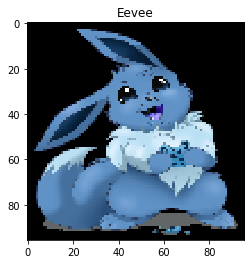

In [50]:
drawImg(X_train[1119],y_train[1119])

In [ ]:
num_classes = 151

# Converts a class vector (integers) to binary class matrix.
y_train = np_utils.to_categorical(y_train, num_classes, dtype='float32')
y_test = np_utils.to_categorical(y_test, num_classes, dtype='float32')